In [3]:
from pymongo import MongoClient
import pandas as pd
import matplotlib.pyplot as plt

client = MongoClient("mongodb://127.0.0.1:27017")
db = client.expense_tracker


In [4]:
monthly = list(db.monthly_summary.find())
df_monthly = pd.DataFrame(monthly)

df_monthly


,_id,total_spent,count,avg_spent,aggregation_level,run_ts
0,"{'year': 2025, 'month': 11}",3329.61,49,67.951224,month,2026-01-02 17:03:16.912
1,"{'year': 2025, 'month': 12}",3939.54,52,75.760385,month,2026-01-02 17:03:16.912


In [5]:
df_monthly["year"] = df_monthly["_id"].apply(lambda x: x["year"])
df_monthly["month"] = df_monthly["_id"].apply(lambda x: x["month"])

df_monthly = df_monthly.drop(columns=["_id"])
df_monthly = df_monthly.sort_values(["year", "month"])

df_monthly


,total_spent,count,avg_spent,aggregation_level,run_ts,year,month
0,3329.61,49,67.951224,month,2026-01-02 17:03:16.912,2025,11
1,3939.54,52,75.760385,month,2026-01-02 17:03:16.912,2025,12


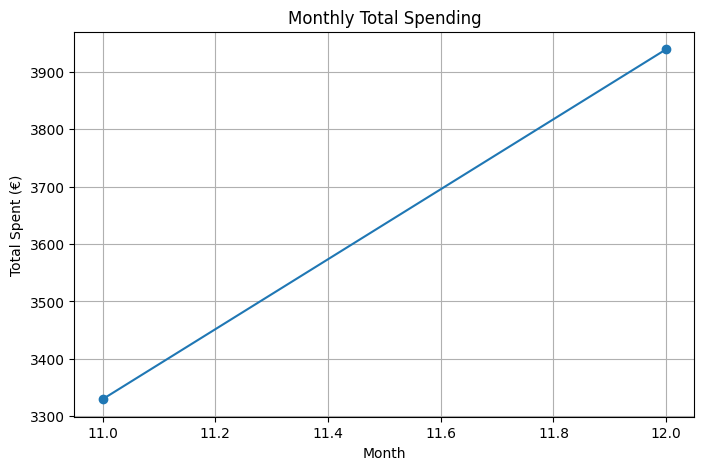

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(
    df_monthly["month"],
    df_monthly["total_spent"],
    marker="o"
)

plt.title("Monthly Total Spending")
plt.xlabel("Month")
plt.ylabel("Total Spent (€)")
plt.grid(True)

plt.show()


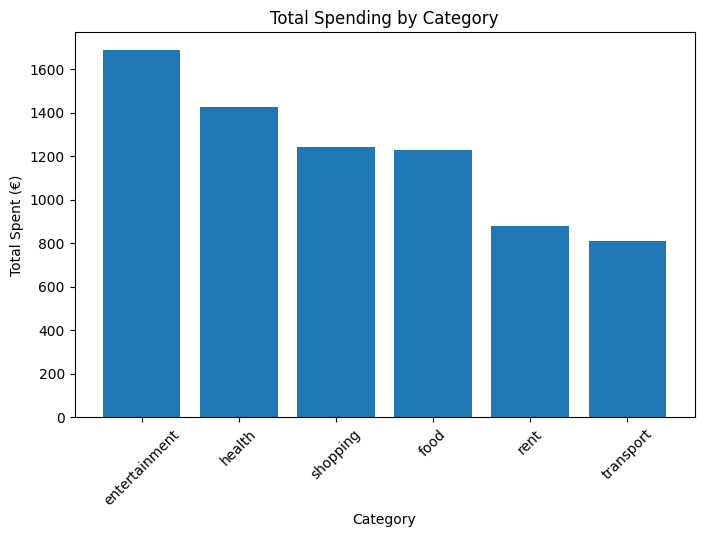

In [7]:
categories = list(db.category_summary.find())
df_cat = pd.DataFrame(categories)

plt.figure(figsize=(8, 5))
plt.bar(df_cat["_id"], df_cat["total_spent"])
plt.title("Total Spending by Category")
plt.xlabel("Category")
plt.ylabel("Total Spent (€)")
plt.xticks(rotation=45)
plt.show()
